In [2]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy
import glob

from scipy.stats import dirichlet

In [23]:
flow_filename = 'Flows_100724_simeventsdiscrete/output_seed12.hdf5'
kde_filename = 'KDEs_200924_simchib02/output_seed12.hdf5'
flow_file = h5py.File(flow_filename, 'r')
kde_file = h5py.File(kde_filename, 'r')

Rel samples in chi_b=0. = 0.99584375
Rel samples in chi_b=0.1 = 0.00415625
Rel samples in chi_b=0.2 = 0.0
Rel samples in chi_b=0.3 = 0.0


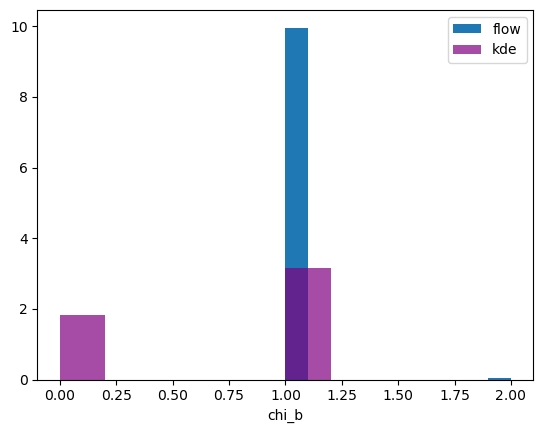

In [4]:
#relative samples in each chi_b
chi_b_samps = list(flow_file['model_selection']['samples']['block1_values'][:,0])
chi_b_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,0])

plt.hist(chi_b_samps, density=True, label='flow')
plt.hist(chi_b_samps_kde, color='Purple', density=True, label='kde', alpha=0.7)
plt.xlabel('chi_b')
plt.legend()
no_chib_samps = np.zeros(4)

#below calculation breaks if there's no samps in chi_b=0. model
for i, samps in enumerate(np.unique(chi_b_samps, return_counts=True)[1]):
    no_chib_samps[i] = samps
print(f'Rel samples in chi_b=0. = {no_chib_samps[0]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.1 = {no_chib_samps[1]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.2 = {no_chib_samps[2]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.3 = {no_chib_samps[3]/len(chi_b_samps)}')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/chib_flow_KDEcomp.pdf')

In [4]:
np.mean(chi_b_samps)

0.0158125

Rel samples in alpha=0.2 = 0.000390625
Rel samples in alpha=0.5 = 0.149453125
Rel samples in alpha=1. = 0.0405390625
Rel samples in alpha=2. = 0.078328125
Rel samples in alpha=5. = 0.7312890625


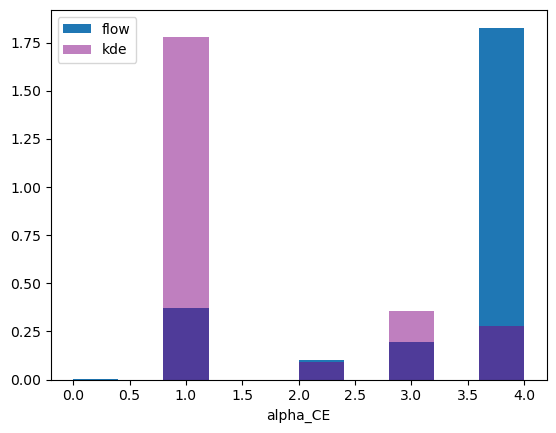

In [5]:
#relative samples in each alpha
alpha_samps = list(flow_file['model_selection']['samples']['block1_values'][:,1])
alpha_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,1])

plt.hist(alpha_samps, density=True, label='flow')
plt.hist(alpha_samps_kde, color='Purple', density=True, label='kde', alpha=0.5)
plt.xlabel('alpha_CE')
plt.legend()

no_alpha_samps = np.unique(alpha_samps, return_counts=True)[1]
print(f'Rel samples in alpha=0.2 = {no_alpha_samps[0]/len(alpha_samps)}')
print(f'Rel samples in alpha=0.5 = {no_alpha_samps[1]/len(alpha_samps)}')
print(f'Rel samples in alpha=1. = {no_alpha_samps[2]/len(alpha_samps)}')
print(f'Rel samples in alpha=2. = {no_alpha_samps[3]/len(alpha_samps)}')
print(f'Rel samples in alpha=5. = {no_alpha_samps[4]/len(alpha_samps)}')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')

In [7]:
np.mean(alpha_samps)

2.98878125

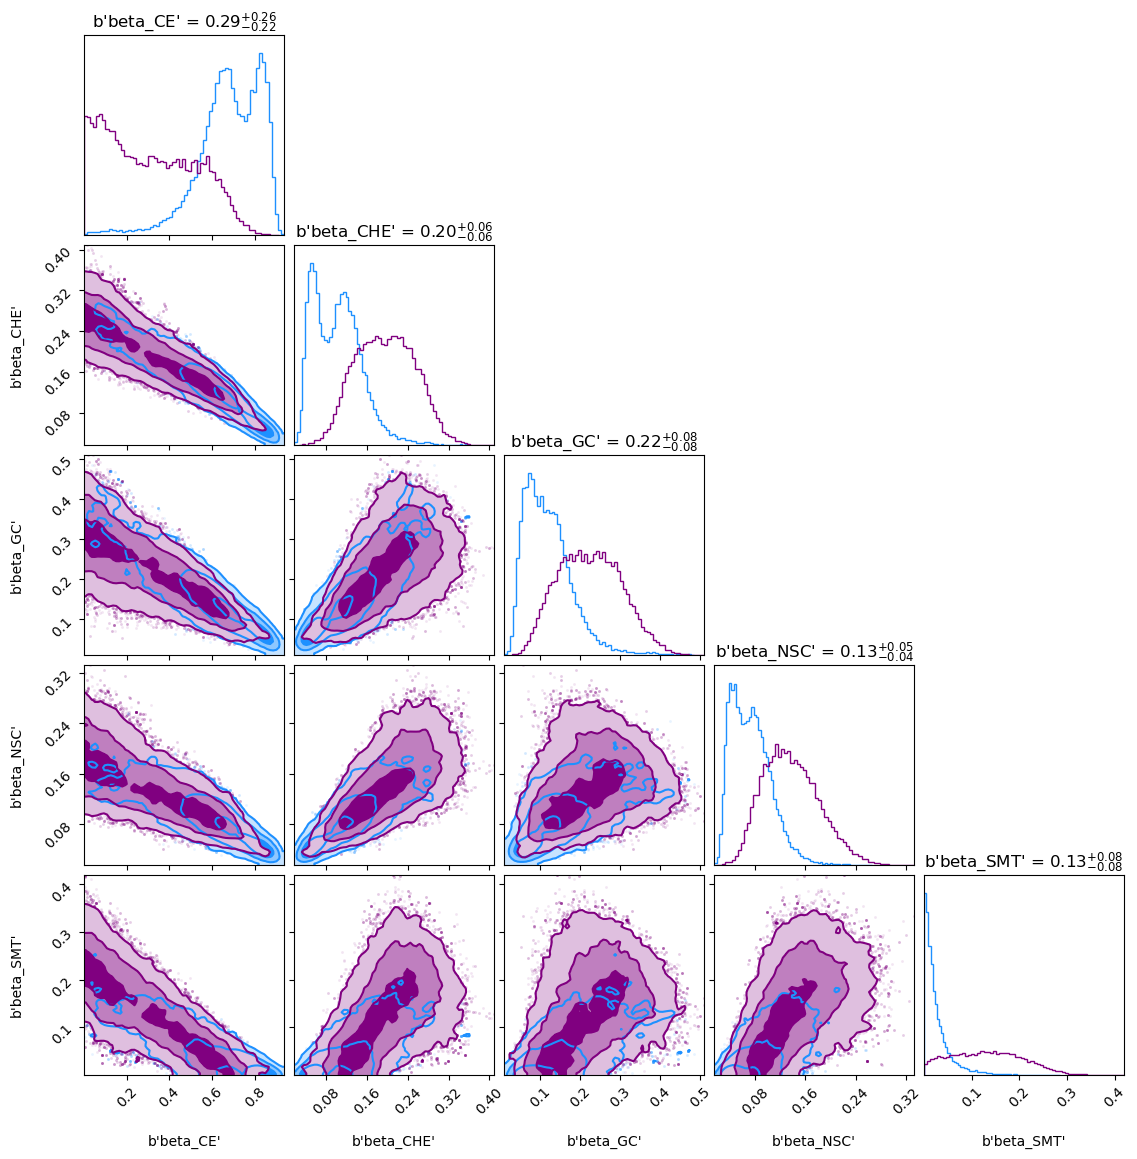

In [4]:
#corner plots of betas
branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
chib_alpha = np.array(flow_file['model_selection']['samples']['block1_values'])
hyperparams = np.hstack((chib_alpha, branching_fracs))

corner_kwargs = dict(
    bins=64,
    smooth=0.9,
    color="dodgerblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
    #range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_kde = dict(
    bins=64,
    smooth=0.9,
    color="purple",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
)

#kwargs = deepcopy(corner_kwargs)
fig_data = corner.corner(branching_fracs, **corner_kwargs)
fig_data = corner.corner(branching_fracs_kde, fig=fig_data, **corner_kwargs_kde)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/BFs_flow_KDEcomp.pdf')

In [10]:
print(np.mean(branching_fracs, axis=0))
print(np.mean(branching_fracs_kde, axis=0))

[0.58828515 0.01687992 0.31081667 0.03617395 0.04784432]
[0.75279734 0.03067612 0.10328986 0.02966085 0.08357583]


### Log plot of branching fractions

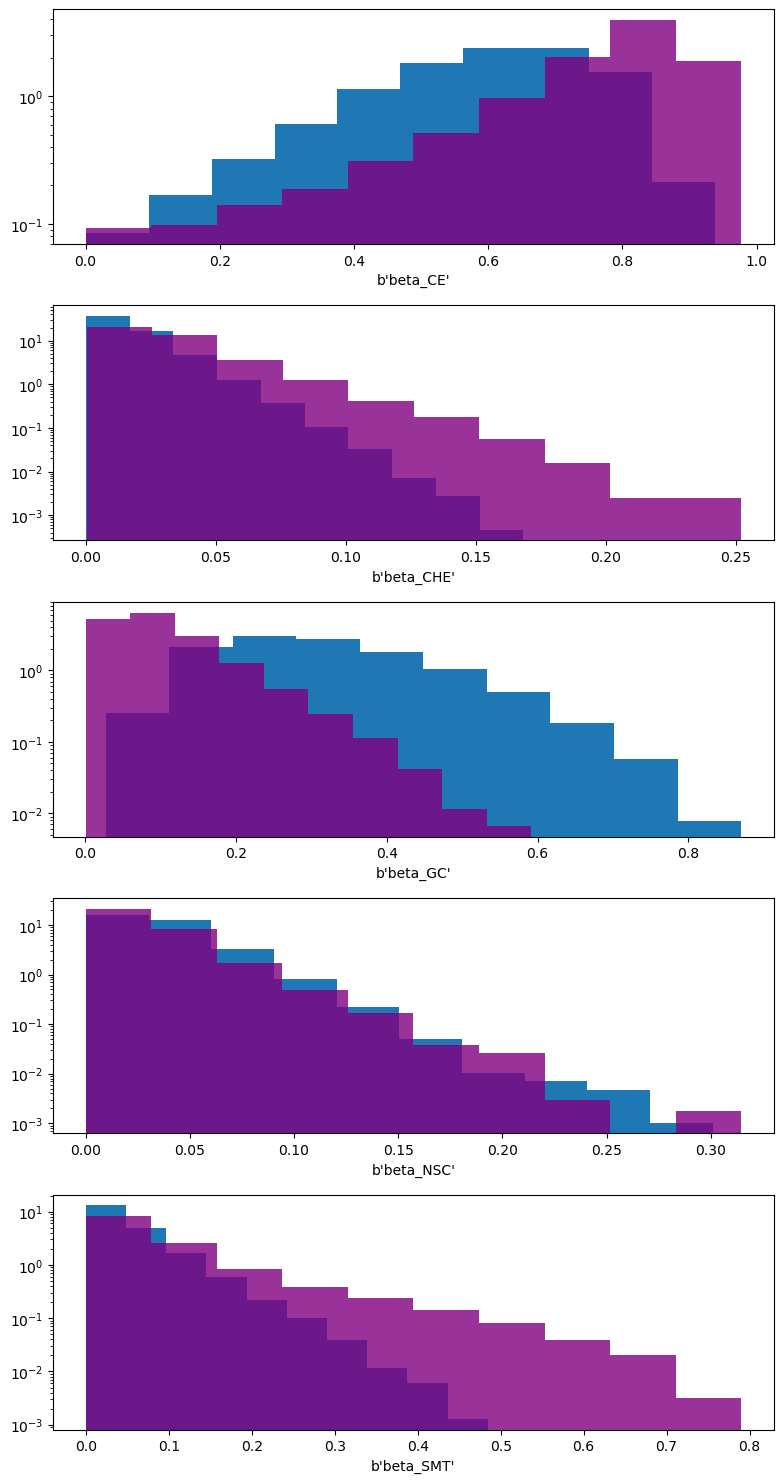

In [11]:
plt.rcParams["figure.figsize"] = (8,15)
fig, ax = plt.subplots(5)
for i in range(5):
    ax[i].hist(branching_fracs[:,i], density=True)
    ax[i].hist(branching_fracs_kde[:,i], density=True, color='purple', alpha=0.8)
    ax[i].set_yscale('log')
    ax[i].set_xlabel(list(flow_file['model_selection']['samples']['block0_items'])[i])
fig.tight_layout(pad=1.3)

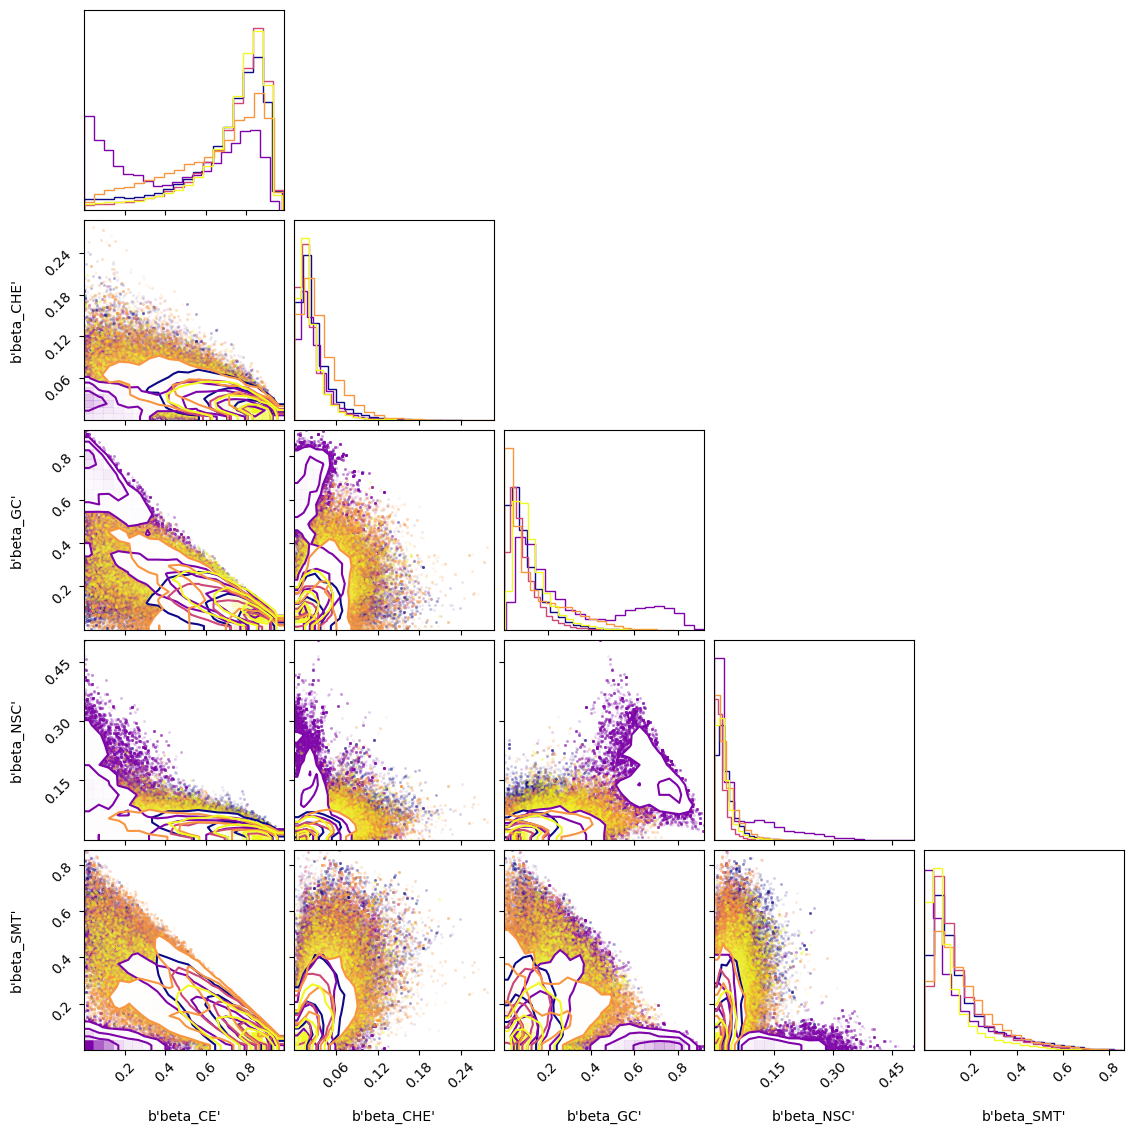

In [37]:


fig_data = corner.corner(branching_fracs_kde, **dict(color='white'))
cmap = plt.colormaps['plasma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 5))

for i, kde_filename in enumerate(glob.glob('KDEs_220524_actcorrectevents/output_*.hdf5')):
    branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
    kde_file = h5py.File(kde_filename, 'r')
    corner.corner(branching_fracs_kde, fig=fig_data, **dict(color=colors[i],labels=list(flow_file['model_selection']['samples']['block0_items'])))

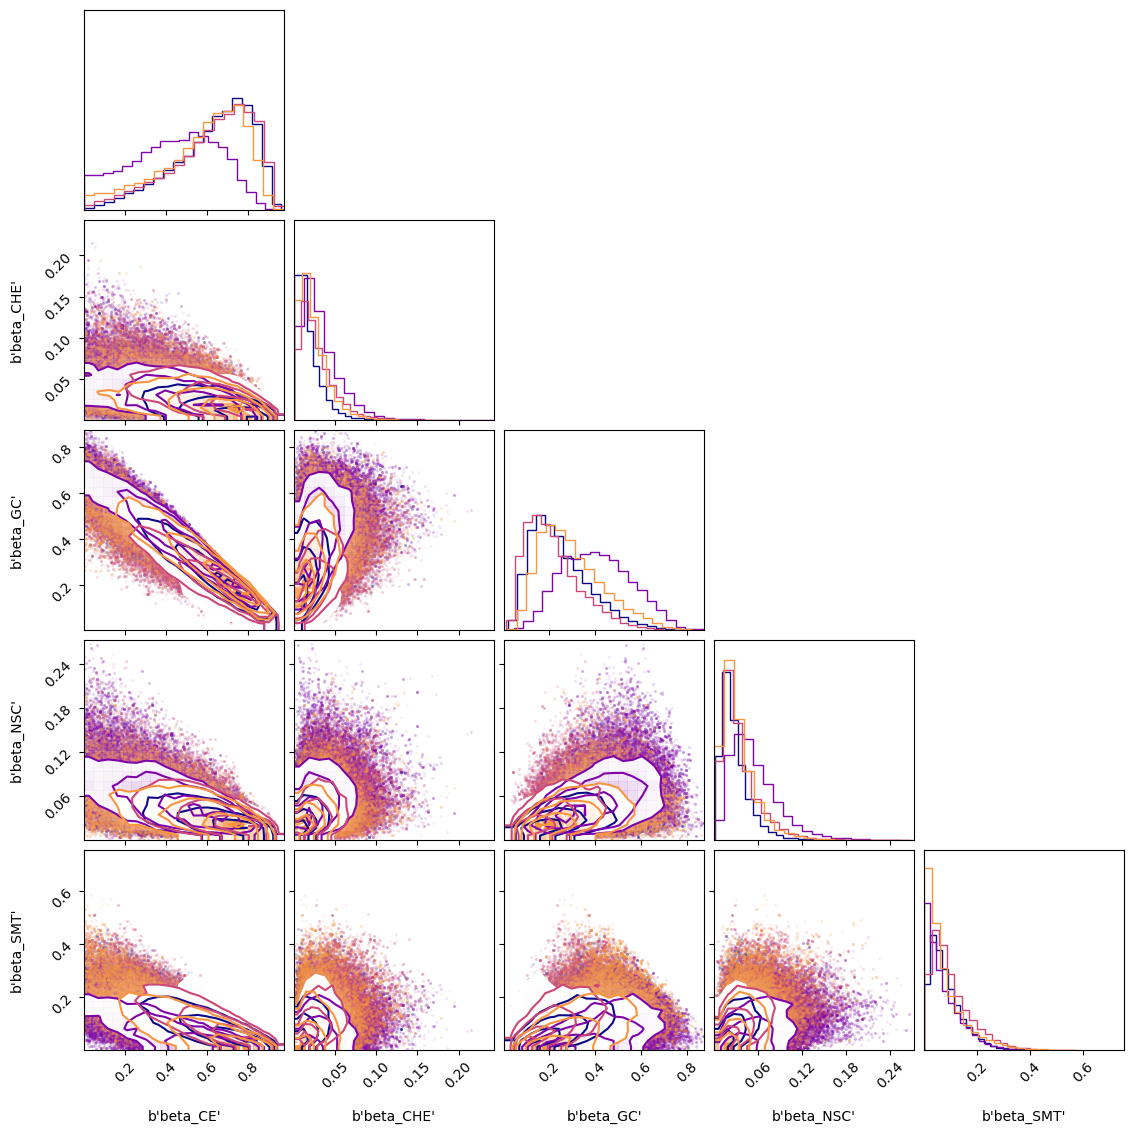

In [40]:


fig_data = corner.corner(branching_fracs_kde, **dict(color='white'))
cmap = plt.colormaps['plasma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 5))

for i, kde_filename in enumerate(glob.glob('Flows_210524_scatter/output*.hdf5')):
    branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
    kde_file = h5py.File(kde_filename, 'r')
    corner.corner(branching_fracs_kde, fig=fig_data, **dict(color=colors[i],labels=list(flow_file['model_selection']['samples']['block0_items'])))

In [3]:
import sys
sys.path.append('../')
from populations.bbh_models import get_models
import populations.bbh_models as read_models
from populations.bbh_models import read_hdf5
from populations import gw_obs
import seaborn as sns
cp = sns.color_palette("colorblind", 6)


/data/wiay/2297403c/conda_envs/amaze/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


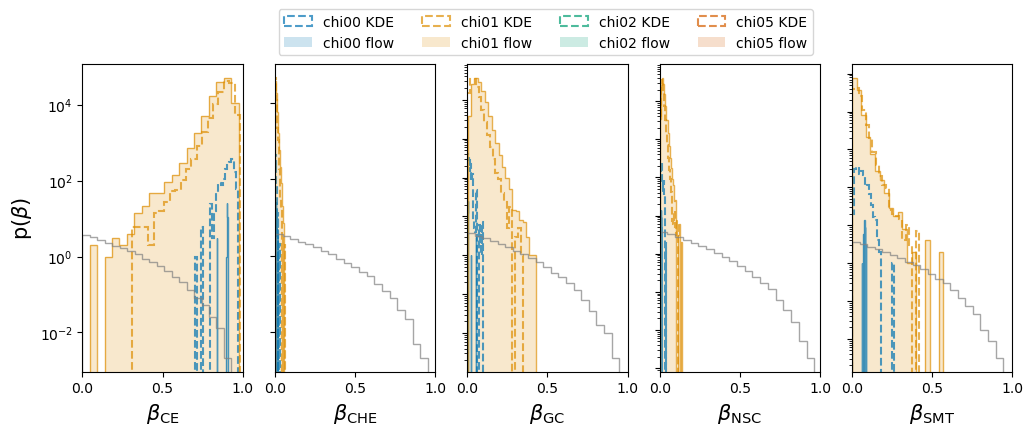

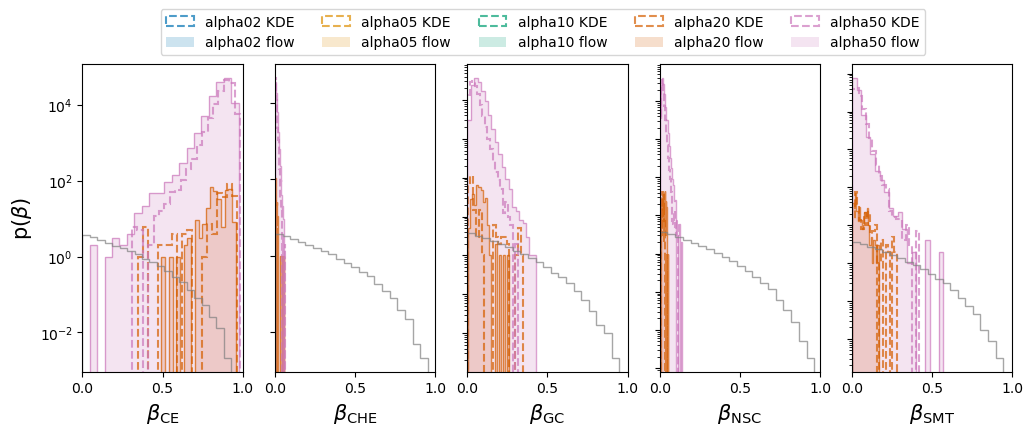

In [19]:
plt.rcParams["figure.figsize"] = (12,4)
kde_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_190824_consistprior/output_seed12.hdf5', 'r')
KDE_samples_allchains = np.hstack([kde_file['model_selection']['samples']['block1_values'], kde_file['model_selection']['samples']['block0_values']])
flow_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_190824_consistprior_disc/output_seed12.hdf5', 'r')
flow_samples_allchains = np.hstack([flow_file['model_selection']['samples']['block1_values'], flow_file['model_selection']['samples']['block0_values']])



channels = ['CE','CHE','GC','NSC','SMT']
channel_label =[r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$']

h_max = 0
submodels_dict= {0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, \
 1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}
Nhyper =2


_concentration = np.ones(len(channels))
beta_p0 =  dirichlet.rvs(_concentration, size=100000)


for hyper_idx in [0,1]:

    fig, ax_margs = plt.subplots(1,5)
    basemdl_samps_kde = len(np.argwhere(KDE_samples_allchains[:,hyper_idx]==0).flatten())
    basemdl_samps_flow = len(np.argwhere(flow_samples_allchains[:,hyper_idx]==0).flatten())

    for midx, model in submodels_dict[hyper_idx].items():
        kde_smdl_locs = np.argwhere(KDE_samples_allchains[:,hyper_idx]==midx).flatten()
        flow_smdl_locs = np.argwhere(flow_samples_allchains[:,hyper_idx]==midx).flatten()

        mdl_samps = len(kde_smdl_locs)
        """if basemdl_samps > 0:
            BF = float(mdl_samps)/basemdl_samps
        else:
            BF = float(mdl_samps)"""
        for cidx, channel in enumerate(channels):
            #KDE
            h, bins, _ = ax_margs[cidx].hist(KDE_samples_allchains[kde_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=20, ls='--', lw=1.5, \
                alpha=0.7, label=model+' KDE')

            #flow
            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=20, \
                alpha=0.7)
            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='stepfilled', color=cp[midx], bins=20, \
                alpha=0.2, label=model+' flow')
            h_max = h.max() if h.max() > h_max else h_max

    # format plot
    for cidx, (channel, ax_marg) in enumerate(zip(channels, ax_margs)):
        #plotprior
        h, bins, _ = ax_margs[cidx].hist(beta_p0[:,cidx], \
                histtype='step', color='grey', bins=20, alpha=0.7, density=True)

        ax_marg.set_xlabel(channel_label[cidx], fontsize=15)
        ax_marg.set_yscale('log')

        ax_marg.set_xlim(0,1)
        if cidx == 0:
            ax_marg.set_ylabel(r"p($\beta$)", fontsize=15)
        else:
            ax_marg.tick_params(labelleft=False)

    # legend
    if hyper_idx ==0:
        ax_marg.legend(loc='upper right', bbox_to_anchor=(-.2, 1.2), ncol=4, prop={'size':10})
    elif hyper_idx==1:
        ax_marg.legend(loc='upper right', bbox_to_anchor=(0.5, 1.2), ncol=5, prop={'size':10})
        
    #plt.savefig(f'../plot/paper_plots/test_discreteBFs_{hyper_idx}.pdf', bbox_inches='tight')

In [20]:
for cidx, channel in enumerate(channels):
    print(f'{np.median(flow_samples_allchains[:, 2+cidx])*100}, + {(-np.median(flow_samples_allchains[:, 2+cidx])+np.quantile(flow_samples_allchains[:, 2+cidx], .95))*100}, - {(np.median(flow_samples_allchains[:, 2+cidx])-np.quantile(flow_samples_allchains[:, 2+cidx], .05))*100}')

88.05508066682752, + 5.5543636488996295, - 10.326294834993831
0.6648014035664279, + 1.1583275112023794, - 0.4915671027575326
6.478662412183047, + 6.843232239173965, - 3.7581285639926962
2.0330149445312493, + 2.1655693911452993, - 1.1190138424457536
2.2875385803414305, + 4.727801720893621, - 1.9954694710373242


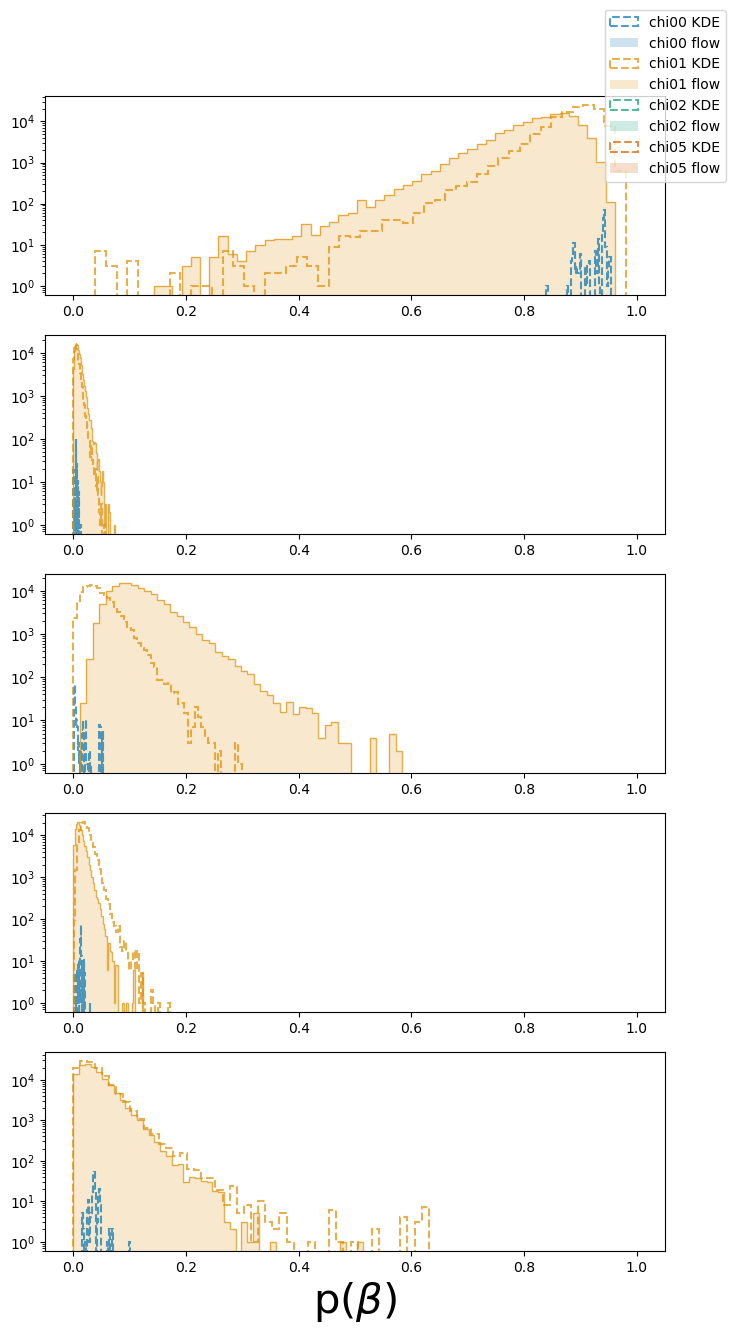

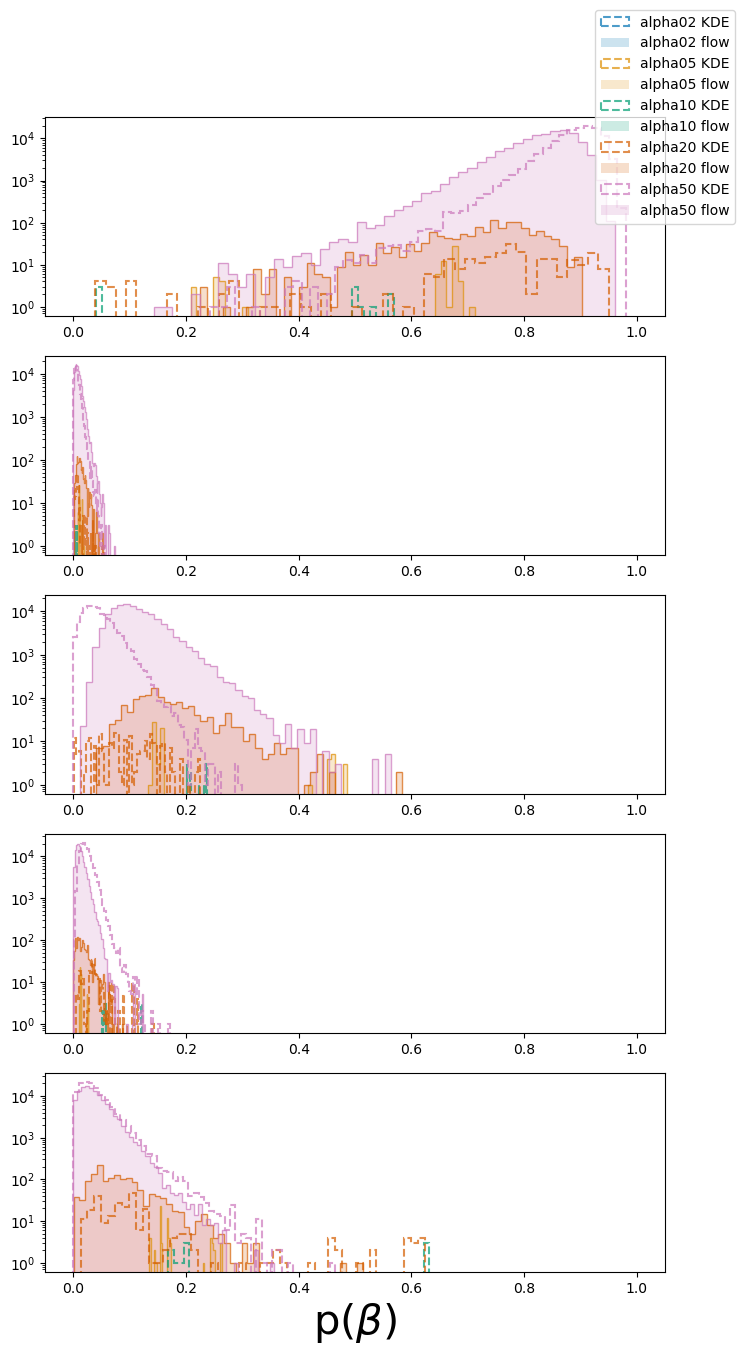

In [25]:
plt.rcParams["figure.figsize"] = (8,15)
kde_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_230624_Gwtc3/output_seed12.hdf5', 'r')
KDE_samples_allchains = np.hstack([kde_file['model_selection']['samples']['block1_values'], kde_file['model_selection']['samples']['block0_values']])
flow_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_200624_Gwtc3/output_seed12.hdf5', 'r')
flow_samples_allchains = np.hstack([flow_file['model_selection']['samples']['block1_values'], flow_file['model_selection']['samples']['block0_values']])

channels = ['CE','CHE','GC','NSC','SMT']

h_max = 0
submodels_dict= {0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, \
 1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}
Nhyper =2


for hyper_idx in [0,1]:
    basemdl_samps_kde = len(np.argwhere(KDE_samples_allchains[:,hyper_idx]==0).flatten())
    basemdl_samps_flow = len(np.argwhere(flow_samples_allchains[:,hyper_idx]==0).flatten())

    fig, ax_margs = plt.subplots(5)
    for midx, model in submodels_dict[hyper_idx].items():
        kde_smdl_locs = np.argwhere(KDE_samples_allchains[:,hyper_idx]==midx).flatten()
        flow_smdl_locs = np.argwhere(flow_samples_allchains[:,hyper_idx]==midx).flatten()

        mdl_samps = len(kde_smdl_locs)
        """if basemdl_samps > 0:
            BF = float(mdl_samps)/basemdl_samps
        else:
            BF = float(mdl_samps)"""
        for cidx, channel in enumerate(channels):
            h, bins, _ = ax_margs[cidx].hist(KDE_samples_allchains[kde_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=50, ls='--', lw=1.5, \
                alpha=0.7, label=model+' KDE')

            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=50, \
                alpha=0.7)
            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='stepfilled', color=cp[midx], bins=50, \
                alpha=0.2, label=model+' flow')
            h_max = h.max() if h.max() > h_max else h_max

    # format plot
    for cidx, (channel, ax_marg) in enumerate(zip(channels, ax_margs)):

        # legend
        if cidx == 0:
            ax_marg.legend(loc='center', bbox_to_anchor=[1.0,1.0], prop={'size':10})

        if cidx == len(channels)-1:
            ax_marg.set_xlabel(r"p($\beta$)", fontsize=30)

        ax_marg.set_yscale('log')
    plt.show()

In [30]:
plt.rcParams["figure.figsize"] = (15,15)
ls = ['-', '--', ':', '-.', '--']



channels = ['CE','CHE','GC','NSC','SMT']

def plot_BFs_seeds(filenames, second_files=None, labels = [None,None]):
    h_max = 0
    submodels_dict= {0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, \
    1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}
    Nhyper =2

    for hyper_idx in [0, 1]:
        fig, ax_margs = plt.subplots(5,len(filenames))

        for i, filename in enumerate(filenames):

            try:
                file = h5py.File(filename, 'r')
            except:
                continue
            samples_allchains = np.hstack([file['model_selection']['samples']['block1_values'], file['model_selection']['samples']['block0_values']])
            basemdl_samps = len(np.argwhere(samples_allchains[:,hyper_idx]==0).flatten())

            if second_files:
                try:
                    comp_file = h5py.File(second_files[i], 'r')
                except:
                    continue
                
                samples_allchains_comp = np.hstack([comp_file['model_selection']['samples']['block1_values'], comp_file['model_selection']['samples']['block0_values']])
                basemdl_samps_comp = len(np.argwhere(samples_allchains_comp[:,hyper_idx]==0).flatten())

            for midx, model in submodels_dict[hyper_idx].items():
                smdl_locs = np.argwhere(samples_allchains[:,hyper_idx]==midx).flatten()

                if second_files:
                    comp_smdl_locs = np.argwhere(samples_allchains_comp[:,hyper_idx]==midx).flatten()

                for cidx, channel in enumerate(channels):
                    h, bins, _ = ax_margs[cidx, i].hist(samples_allchains[smdl_locs, cidx+Nhyper], \
                        histtype='step', color=cp[midx], bins=50, ls='-', lw=1.5+(0.2*i), \
                        alpha=0.7, label=model+labels[0])
                    if second_files:
                        h, bins, _ = ax_margs[cidx, i].hist(samples_allchains_comp[comp_smdl_locs, cidx+Nhyper], \
                            histtype='stepfilled', color=cp[midx], bins=50, \
                            alpha=0.3, label=model+labels[1])
                        h, bins, _ = ax_margs[cidx, i].hist(samples_allchains_comp[comp_smdl_locs, cidx+Nhyper], \
                            histtype='step', color=cp[midx], bins=50, \
                            alpha=0.7)
                    h_max = h.max() if h.max() > h_max else h_max

            # format plot
            for cidx, (channel, ax_marg) in enumerate(zip(channels, ax_margs)):
                #median branching fractions
                lower_5 = np.percentile(samples_allchains[:, cidx+Nhyper], 5)
                upper_95 = np.percentile(samples_allchains[:, cidx+Nhyper], 95)
                median = np.percentile(samples_allchains[:, cidx+Nhyper], 50)
                ax_margs[cidx, i].vlines([lower_5, median, upper_95], 0,30000, color='black', alpha=0.5)

                # legend
                if i==0:
                    ax_marg[i].set_ylabel(f"{channel}", fontsize=30)
                    
                if cidx == 0 and i ==len(filenames)-1:
                    ax_marg[i].legend(loc='center', bbox_to_anchor=[1.2,1.0], prop={'size':10})

                if cidx == len(channels)-1:
                    ax_marg[i].set_xlabel(r"$\beta$", fontsize=30)

                ax_marg[i].set_yscale('log')
                ax_marg[i].set_xlim(0,1)
                ax_marg[i].set_ylim(0,30000)

/tmp/ipykernel_1476054/4289989595.py:74: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_marg[i].set_ylim(0,30000)


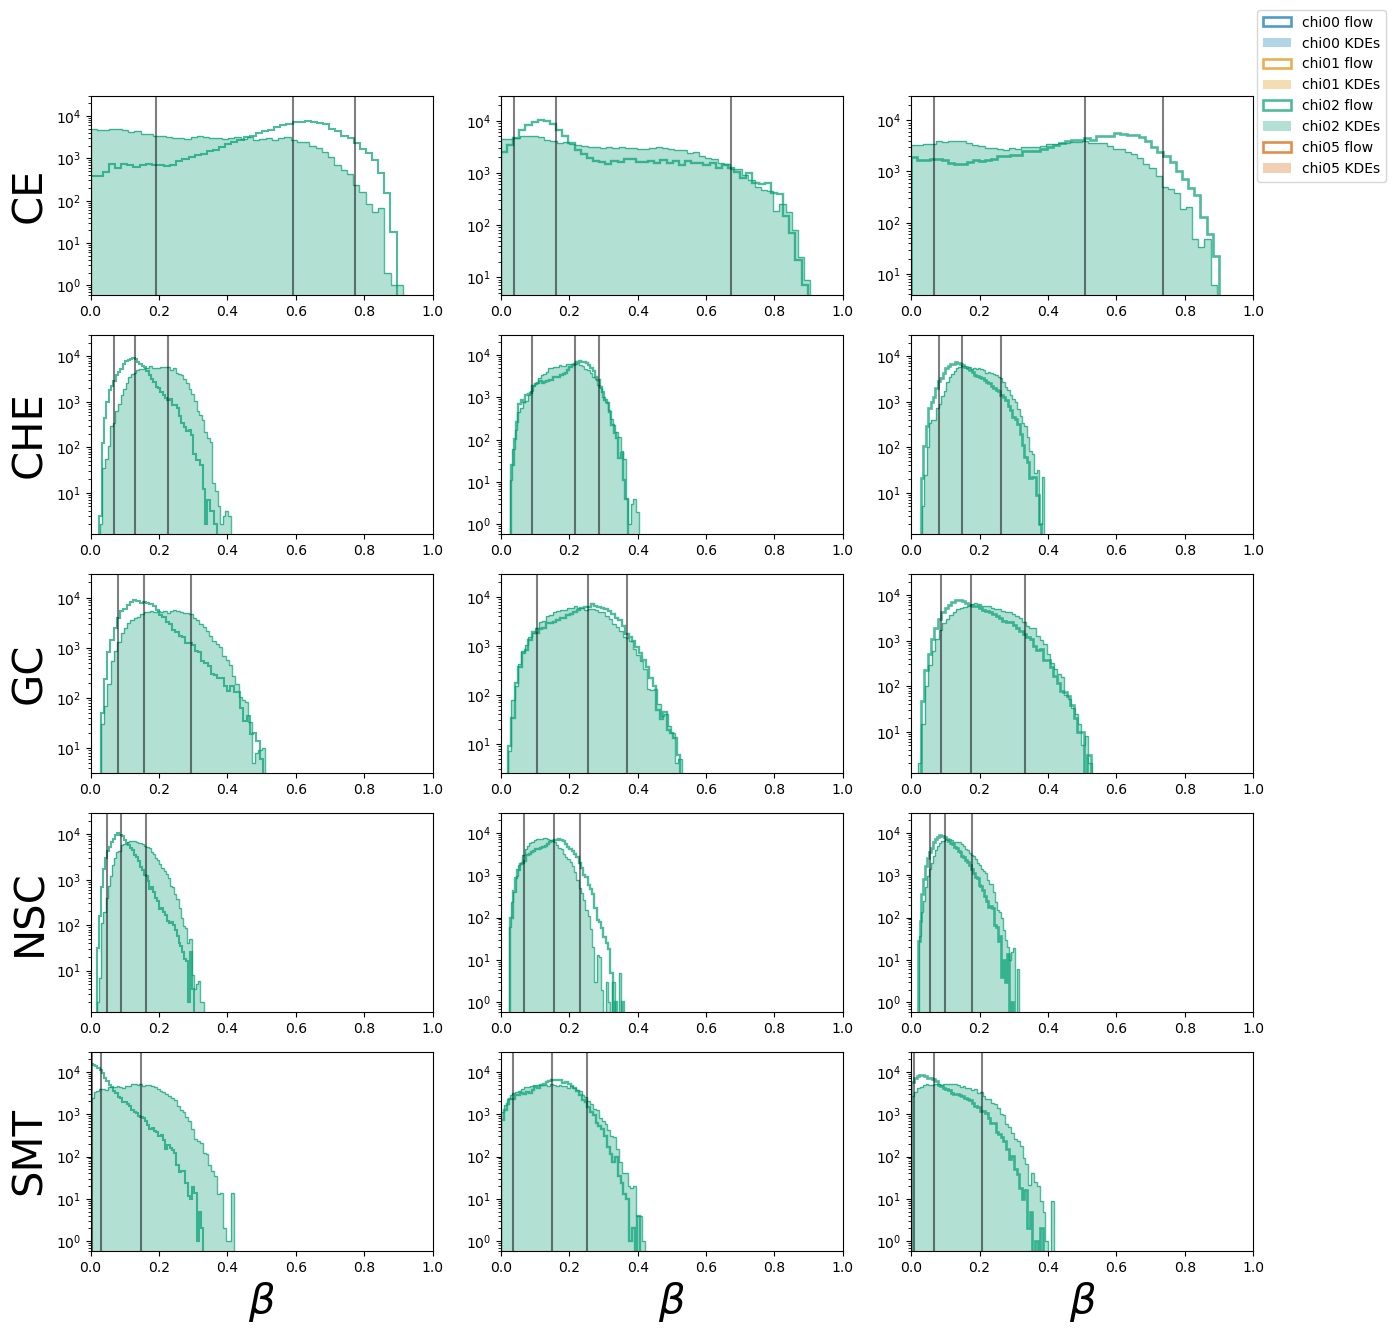

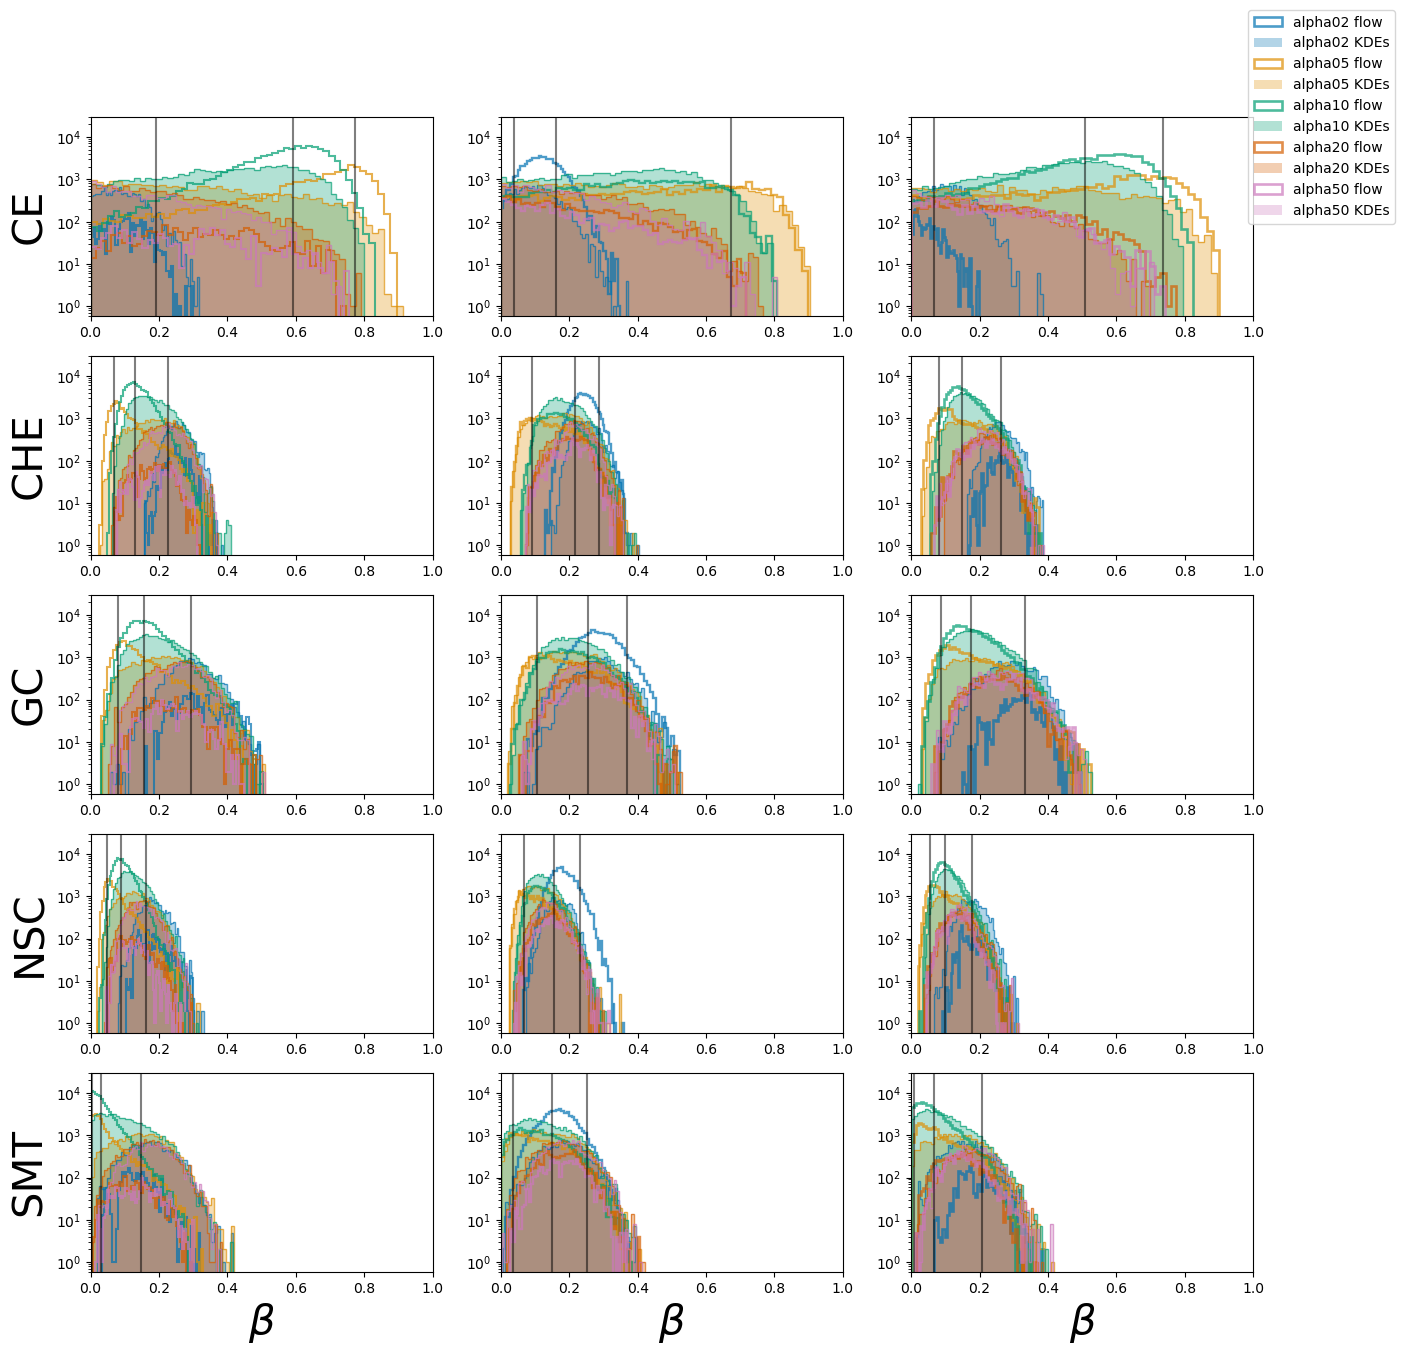

In [34]:
KDE_files = ['KDEs_200924_simchib02/output_seed12.hdf5',
 'KDEs_200924_simchib02/output_seed89.hdf5',
 'KDEs_200924_simchib02/output_seed314.hdf5']
 #'KDEs_200924_simchib02/output.hdf5']

flow_lowreg = ['flows_260924_simeventsdisc_trainlogalpha/output_seed12.hdf5',
 'flows_260924_simeventsdisc_trainlogalpha/output_seed89.hdf5',
 'flows_260924_simeventsdisc_trainlogalpha/output_seed314.hdf5']
 #'flows_260924_simeventsdisc_trainlogalpha/output.hdf5']

plot_BFs_seeds(flow_lowreg, KDE_files, labels=[' flow', ' KDEs'])

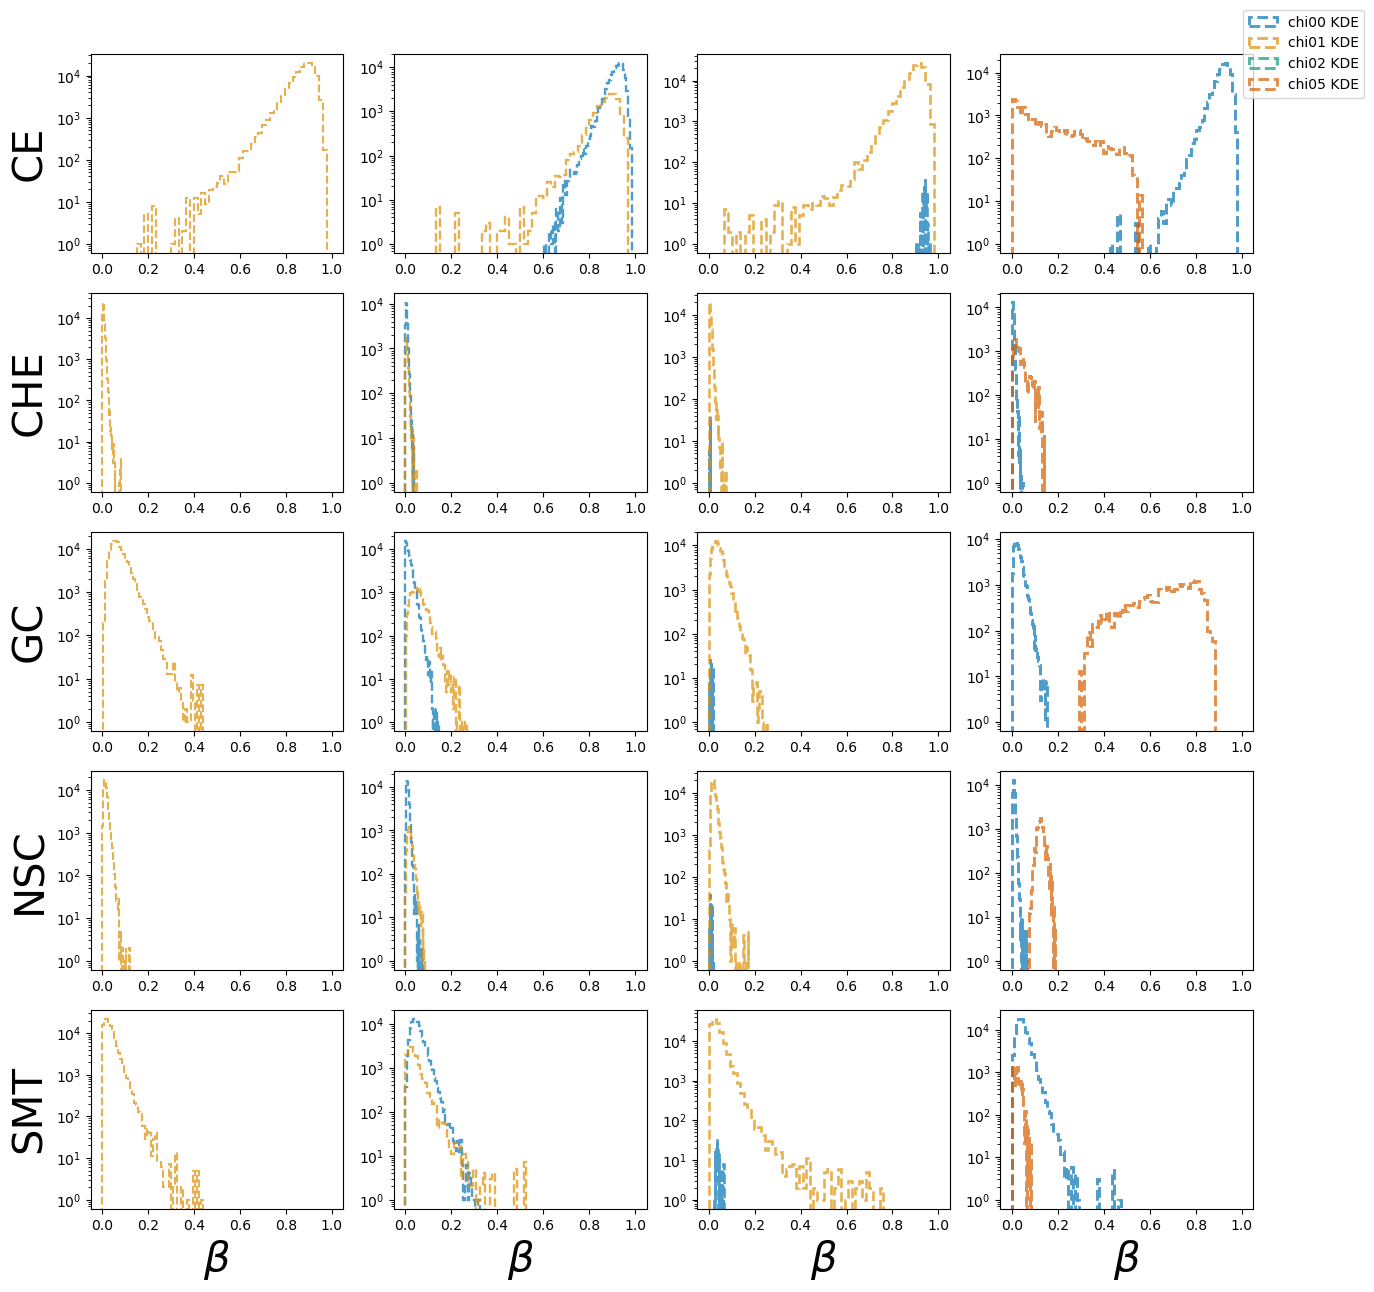

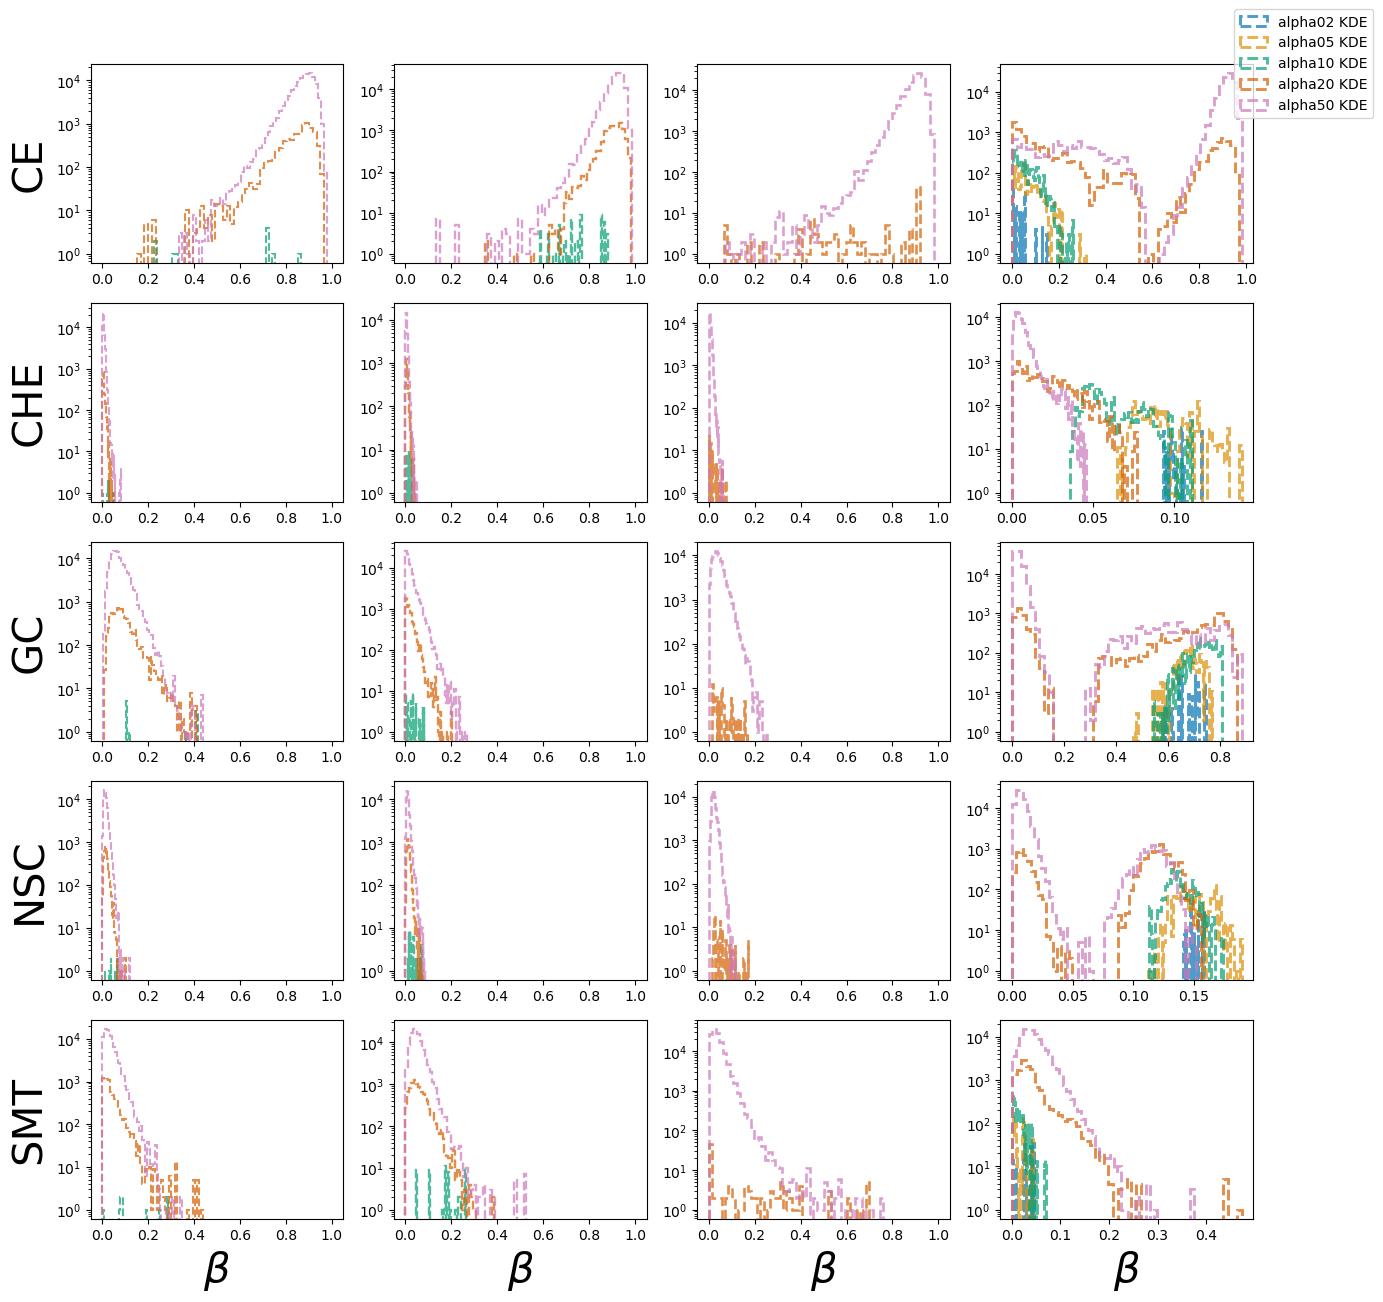

In [61]:
plot_BFs_seeds(KDE_files, labels=[' KDE', None])

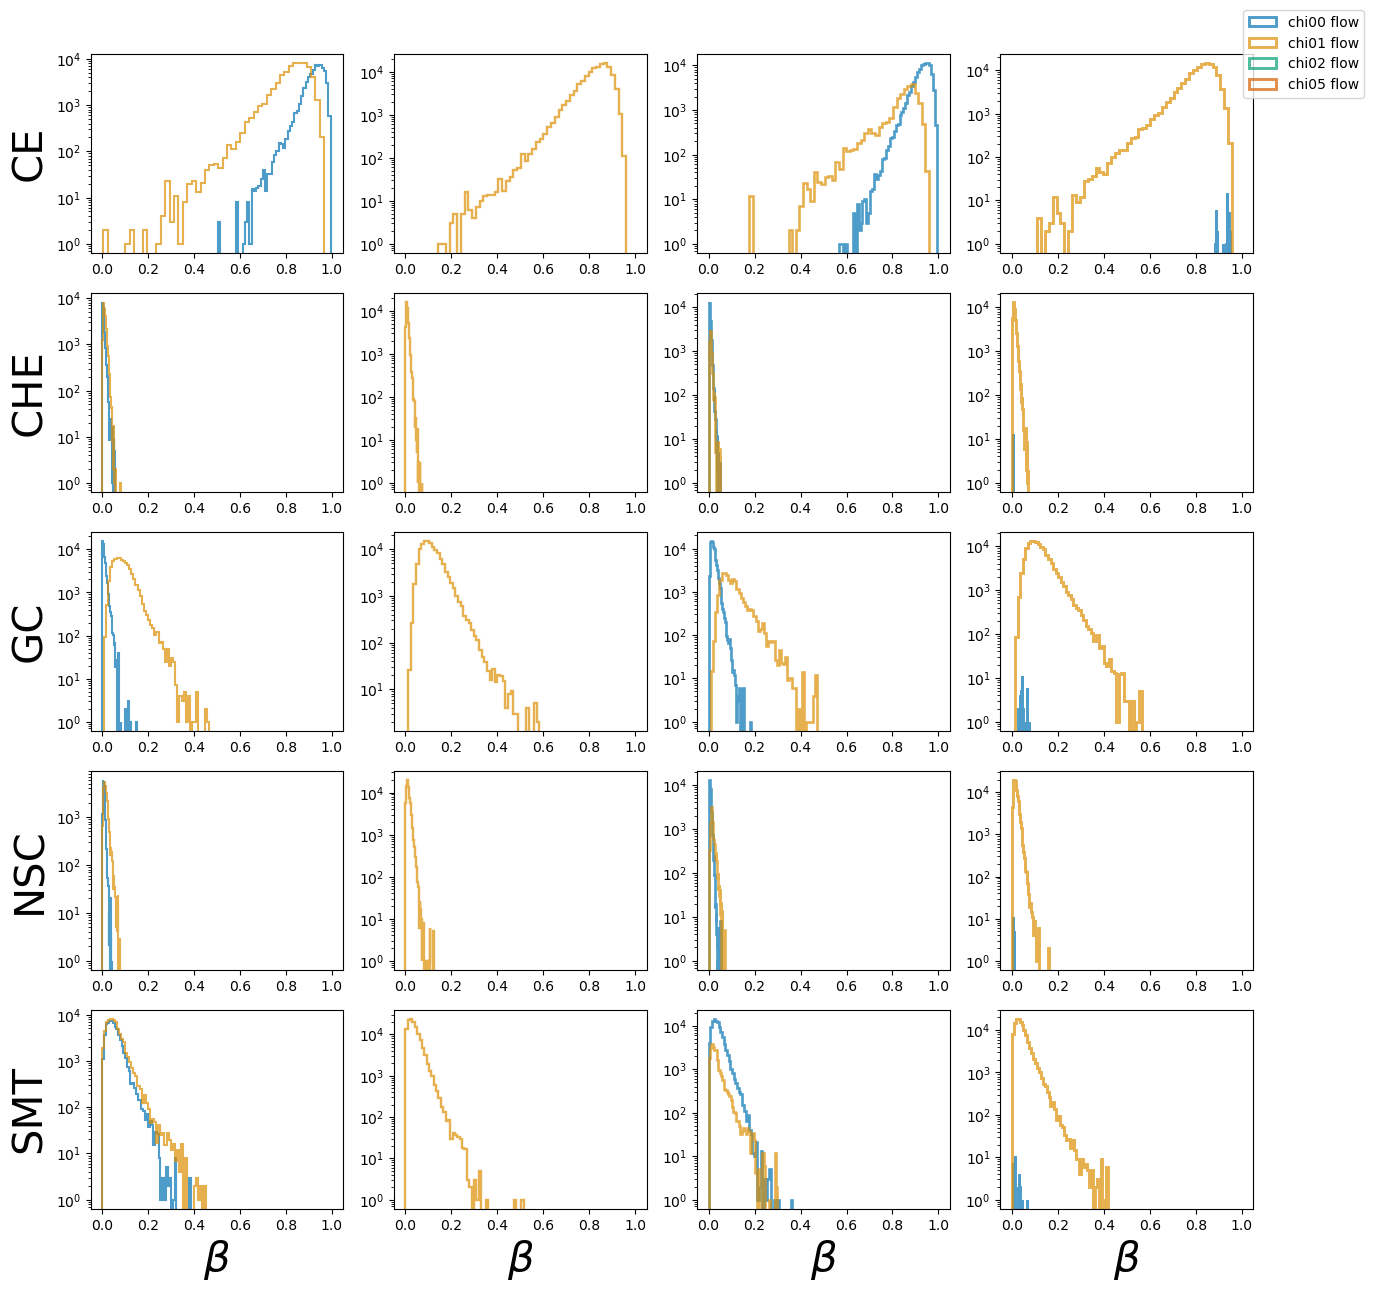

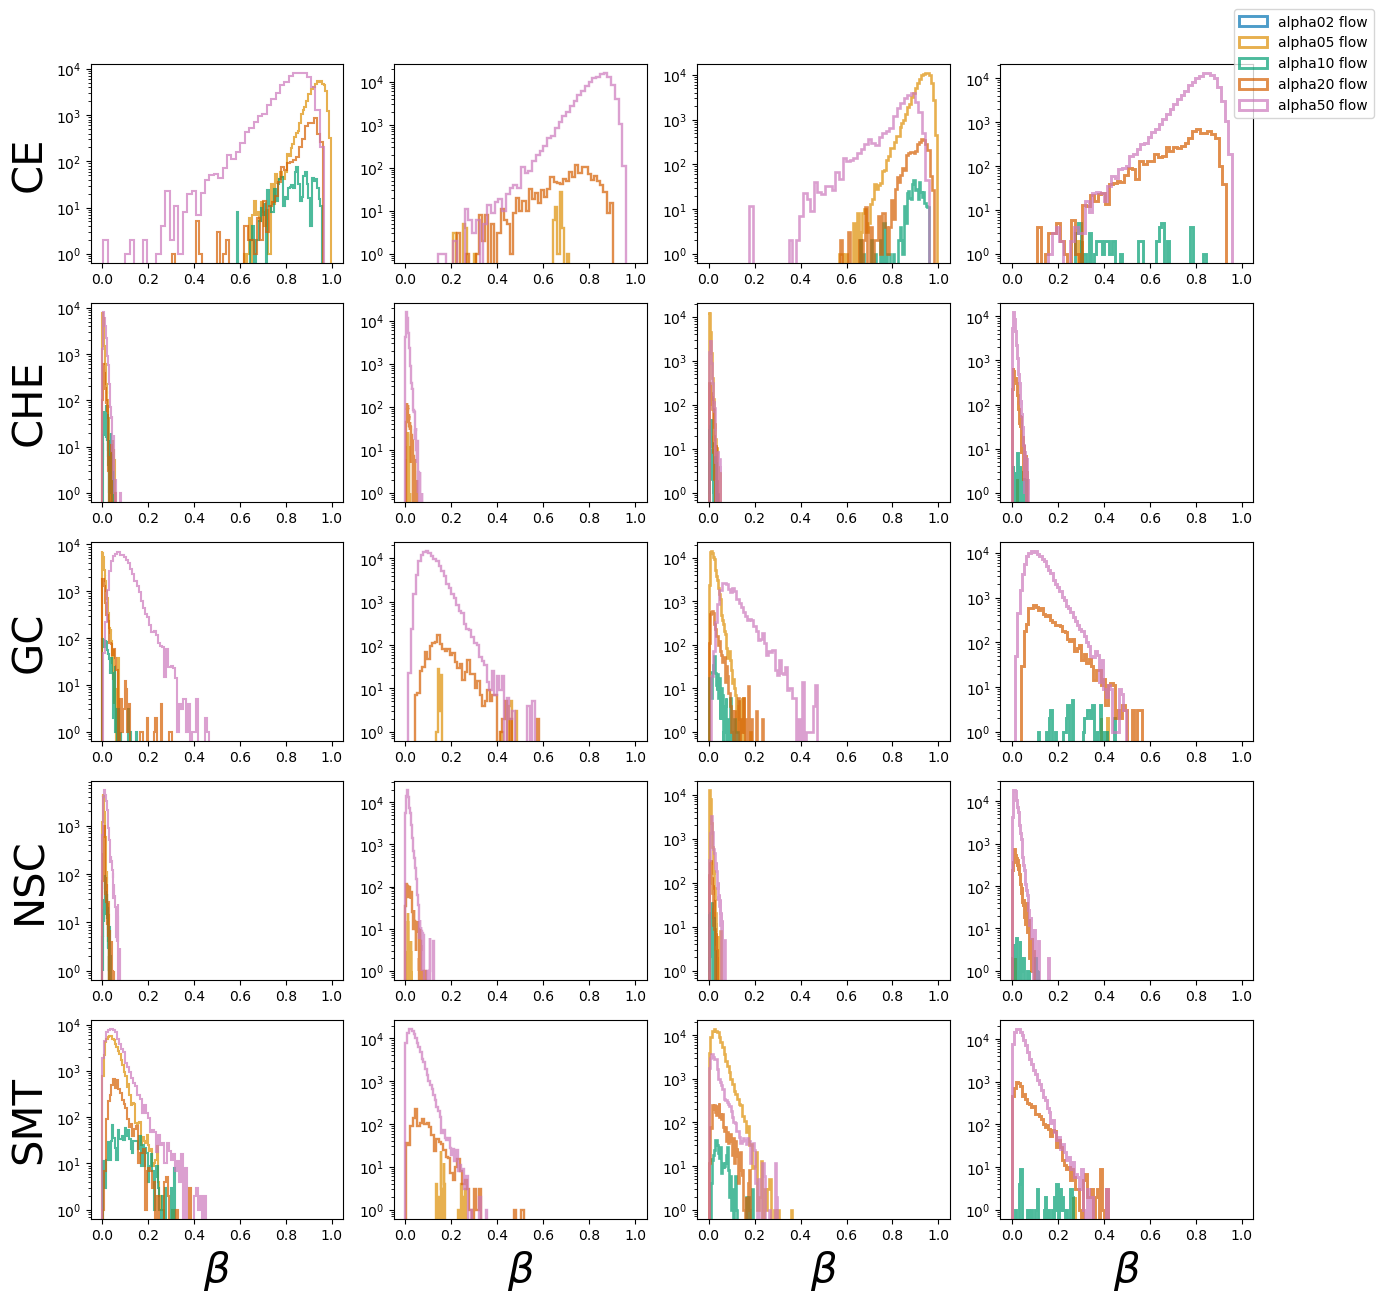

In [13]:
plot_BFs_seeds(['Flows_200624_Gwtc3/output_seed314.hdf5',
 'Flows_200624_Gwtc3/output_seed12.hdf5',
 'Flows_200624_Gwtc3/output_seed89.hdf5',
 'Flows_200624_Gwtc3/output.hdf5'], labels=[' flow', None])

In [ ]:
detectable_samples = samples.copy()
smdls = list(set([x.split('/',1)[1] for x in model_names]))
# get the conversion factors between the detectable and underlying distributions
for smdl in sorted(smdls):
    detectable_convfacs = []
    for channel in channels:
        detectable_convfacs.append(getFromDict(pop_models, [channel]+smdl.split('/')).alpha)
    detectable_convfacs = np.asarray(detectable_convfacs)
    # loop over hyperparams to get samples in this submodel
    hyperparams = smdl.split('/')
    for idx, param in enumerate(hyperparams):
        hyper_idx = list(submodels_dict[idx].keys())[list(submodels_dict[idx].values()).index(param)]
        if idx==0:
            matching_idxs = np.where(samples[:,idx] == hyper_idx)[0]
            matching_samps = samples[matching_idxs]
        else:
            matching_idxs = matching_idxs[np.where(matching_samps[:,idx] == hyper_idx)[0]]
            matching_samps = samples[matching_idxs]
    # if no samples are in this model, continue
    if len(matching_idxs)==0:
        continue
    # convert hyperparams of these samples accordingly to get the underlying betas
    converted_betas = detectable_samples[matching_idxs,len(hyperparams):] * detectable_convfacs
    converted_betas /= converted_betas.sum(axis=1, keepdims=True)
    detectable_samples[matching_idxs,len(hyperparams):] = converted_betas